In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, roc_curve, auc
import seaborn as sns

import metrics_summary as ms

In [33]:
np.random.seed(170)

In [34]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").values.ravel()
y_test = pd.read_csv("data/y_test.csv").values.ravel()

In [35]:
# implement SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
os = SMOTE()
X_os, y_os = os.fit_resample(X_train, y_train)
print(X_os.shape, y_os.shape)

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_os = KNeighborsClassifier()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg_cs = LogisticRegression(max_iter=1000, class_weight="balanced")
logreg_os = LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_cs = SGDClassifier(class_weight="balanced")
sgd_os = SGDClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_cs = DecisionTreeClassifier(class_weight="balanced")
dt_os = DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_cs = RandomForestClassifier(class_weight="balanced")
rf_os = RandomForestClassifier()

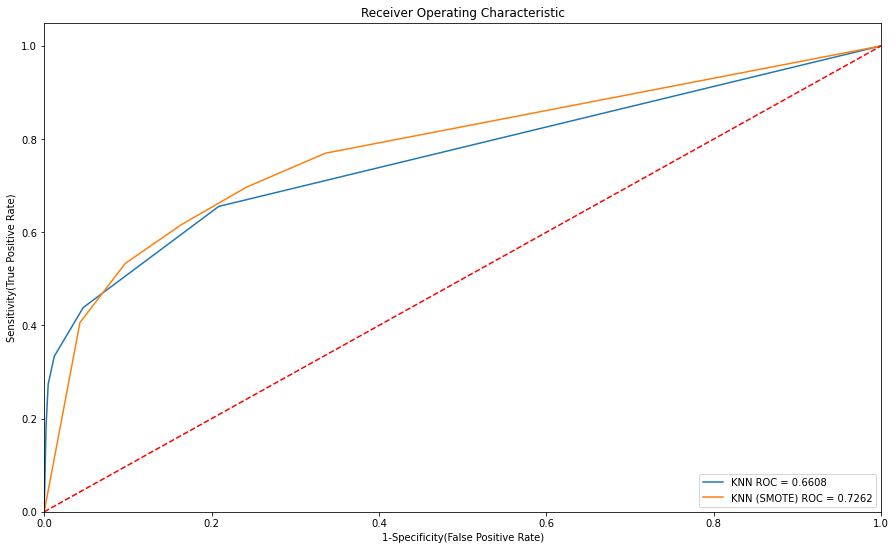

In [ ]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(15, 9))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'KNN',
    'model': knn,
    'smote': False
},
{
    'label': 'KNN (SMOTE)',
    'model': knn_os,
    'smote': True
},
{
    'label': 'Logistic Regression',
    'model': logreg,
    'smote': False
},
{
    'label': 'Logistic Regression (Cost-Sensitive Learning)',
    'model': logreg_cs,
    'smote': False
},
{
    'label': 'Logistic Regression (SMOTE)',
    'model': logreg_os,
    'smote': True
},
{
    'label': 'Stochastic Gradient Descent',
    'model': sgd,
    'smote': False
},
{
    'label': 'Stochastic Gradient Descent (Cost-Sensitive Learning)',
    'model': sgd_cs,
    'smote': False
},
{
    'label': 'Stochastic Gradient Descent (SMOTE)',
    'model': sgd_os,
    'smote': True
},
{
    'label': 'Random Forest',
    'model': rf,
    'smote': False
},
{
    'label': 'Random Forest (Cost-Sensitive Learning)',
    'model': rf_cs,
    'smote': False
},
{
    'label': 'Random Forest (SMOTE)',
    'model': rf_os,
    'smote': True
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    if m['smote'] == False:
        model.fit(X_train, y_train) # train the model
    else:
        model.fit(X_os, y_os)
    y_pred = model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    # auc = ms.crossval_summary(model, X_train, y_train)
    auc = roc_auc_score(y_test, y_pred)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s = %0.4f' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of All Models')
plt.legend(loc="lower right")
plt.show()   # Display

KNN
KNN (SMOTE)


c:\Users\Brian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression


c:\Users\Brian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (Cost-Sensitive Learning)


c:\Users\Brian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (SMOTE)
Decision Trees
Decision Trees (Cost-Sensitive Learning)
Decision Trees (SMOTE)
Random Forest
Random Forest (Cost-Sensitive Learning)
Random Forest (SMOTE)


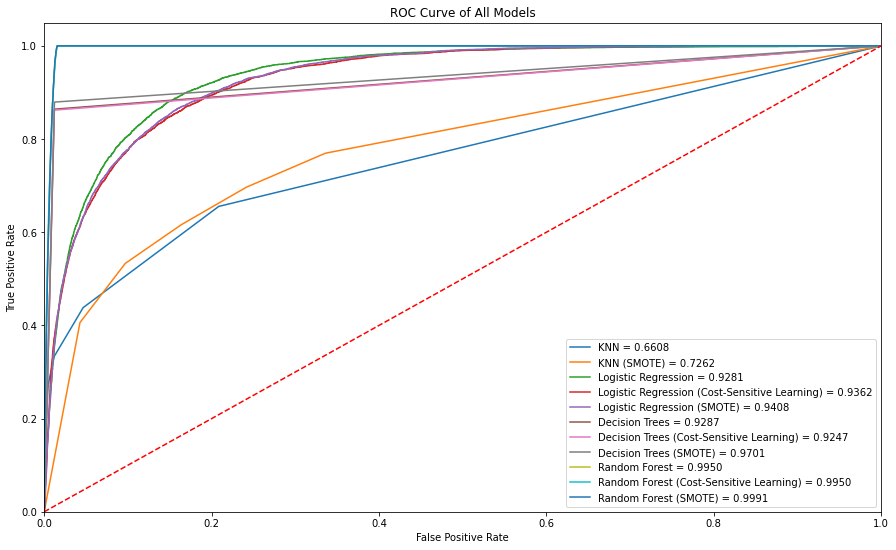

In [37]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(15, 9))

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'KNN',
    'model': knn,
    'auc': 0.6608,
    'smote': False
},
{
    'label': 'KNN (SMOTE)',
    'model': knn_os,
    'auc':0.7262,
    'smote': True
},
{
    'label': 'Logistic Regression',
    'model': logreg,
    'auc': 0.928102946487612,
    'smote': False
},
{
    'label': 'Logistic Regression (Cost-Sensitive Learning)',
    'model': logreg_cs,
    'auc': 0.9361968100628928,
    'smote': False
},
{
    'label': 'Logistic Regression (SMOTE)',
    'model': logreg_os,
    'auc': 0.9407807495625093,
    'smote': True
},
# {
#     'label': 'Stochastic Gradient Descent',
#     'model': sgd,
#     'auc': 0.7439290295119199,
#     'smote': False
# },
# {
#     'label': 'Stochastic Gradient Descent (Cost-Sensitive Learning)',
#     'model': sgd_cs,
#     'auc': 0.7762748340383963,
#     'smote': False
# },
# {
#     'label': 'Stochastic Gradient Descent (SMOTE)',
#     'model': sgd_os,
#     'auc': 0.844196405126646,
#     'smote': True
# },
{
    'label': 'Decision Trees',
    'model': dt,
    'auc': 0.928743237447193,
    'smote': False
},
{
    'label': 'Decision Trees (Cost-Sensitive Learning)',
    'model': dt_cs,
    'auc': 0.9246561935599523,
    'smote': False
},
{
    'label': 'Decision Trees (SMOTE)',
    'model': dt_os,
    'auc': 0.9701438159155937,
    'smote': True
},
{
    'label': 'Random Forest',
    'model': rf,
    'auc': 0.9950250101830788,
    'smote': False
},
{
    'label': 'Random Forest (Cost-Sensitive Learning)',
    'model': rf_cs,
    'auc': 0.9949627746914771,
    'smote': False
},
{
    'label': 'Random Forest (SMOTE)',
    'model': rf_os,
    'auc': 0.9990955992055133,
    'smote': True
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    if m['smote'] == False:
        model.fit(X_train, y_train) # train the model
    else:
        model.fit(X_os, y_os)
    y_pred = model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    # auc = ms.crossval_summary(model, X_train, y_train)
    # auc = roc_auc_score(y_test, y_pred)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s = %0.4f' % (m['label'], m['auc']), linewidth=1.5)
    print(m['label'])
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of All Models')
plt.legend(loc="lower right")
plt.show()   # Display